<a href="https://colab.research.google.com/github/1ZeroStorm/Machine_Learning_Projects/blob/main/SATRIA2025%20-%20Logistic%20%26%20Linear%20Regression/Problem2%20(LogisticRegression)/LogisticRegression_Problem2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

PROBLEM 02 - LOGISTIC REGRESSION

***

<br>

In this project, your task is to build a logistic regression model that can predict the age of abalones based on various characteristics. Abalones, a type of marine mollusk, have been studied extensively for their biological traits and growth patterns, making them an ideal subject for such predictive modeling tasks.

The dataset you're working with contains several key features that provide information about the abalones. These features are measured and recorded for each abalone sample, offering insights into their size, weight, and other physical properties that might correlate with their age.

The dataset contains:
- Sex: 0, 1, or 2
- Length: 0 to 1
- Diameter: 0 hingga 1
- Height: 0 to 2
- Whole weight Shucked weight: 0 to 3
- Viscera weight: 0 to 2
- Shell weight: 0 to 1
- Rings: 0 to 1
- Age: 0 to 30

Your task is to analyze this data, build a regression model, and explore how different variables can be used to predict its age.

### Import Python Library (2 Point)

In [1]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


### Read the CSV Files (8 Point)

In [2]:
# Baca file CSV
# read the csv files

df = pd.read_csv('data_problem_2.csv')
df

,Sex,Length,Diameter,Height,Whole weightShucked weight,Viscera weight,Shell weight,Rings,Age
0,1,0.550,0.445,0.125,0.6720,0.2880,0.1365,0.210,11
1,1,0.475,0.355,0.100,0.5035,0.2535,0.0910,0.140,8
2,0,0.305,0.225,0.070,0.1485,0.0585,0.0335,0.045,7
3,1,0.275,0.200,0.065,0.1165,0.0565,0.0130,0.035,7
4,2,0.495,0.380,0.135,0.6295,0.2630,0.1425,0.215,12
...,...,...,...,...,...,...,...,...,...
3336,0,0.490,0.400,0.115,0.5690,0.2560,0.1325,0.145,9
3337,0,0.670,0.550,0.190,1.3905,0.5425,0.3035,0.400,12
3338,2,0.510,0.395,0.125,0.5805,0.2440,0.1335,0.188,11
3339,2,0.575,0.465,0.120,1.0535,0.5160,0.2185,0.235,9


In [3]:
# Tampilkan 5 data pertama
# show the first 5 data
df.head()

,Sex,Length,Diameter,Height,Whole weightShucked weight,Viscera weight,Shell weight,Rings,Age
0,1,0.550,0.445,0.125,0.6720,0.2880,0.1365,0.210,11
1,1,0.475,0.355,0.100,0.5035,0.2535,0.0910,0.140,8
2,0,0.305,0.225,0.070,0.1485,0.0585,0.0335,0.045,7
3,1,0.275,0.200,0.065,0.1165,0.0565,0.0130,0.035,7
4,2,0.495,0.380,0.135,0.6295,0.2630,0.1425,0.215,12


In [4]:
# Tampilkan 5 data terakhir
# show the last 5 data
df.tail()

,Sex,Length,Diameter,Height,Whole weightShucked weight,Viscera weight,Shell weight,Rings,Age
3336,0,0.490,0.400,0.115,0.5690,0.2560,0.1325,0.145,9
3337,0,0.670,0.550,0.190,1.3905,0.5425,0.3035,0.400,12
3338,2,0.510,0.395,0.125,0.5805,0.2440,0.1335,0.188,11
3339,2,0.575,0.465,0.120,1.0535,0.5160,0.2185,0.235,9
3340,0,0.595,0.475,0.160,1.1405,0.5470,0.2310,0.271,6


In [5]:
# Tampilkan ringkasan (kolom, tipe data, dan jumlah non-null) dari data
# show the summary (columns, data types, non-null count) of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3341 entries, 0 to 3340
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Sex                         3341 non-null   int64  
 1   Length                      3341 non-null   float64
 2   Diameter                    3341 non-null   float64
 3   Height                      3341 non-null   float64
 4   Whole weightShucked weight  3341 non-null   float64
 5   Viscera weight              3341 non-null   float64
 6   Shell weight                3341 non-null   float64
 7   Rings                       3341 non-null   float64
 8   Age                         3341 non-null   int64  
dtypes: float64(7), int64(2)
memory usage: 235.0 KB


In [6]:
# Tampilkan ringkasan statistik (untuk kolom numerik)
# show the stats summary (for numeric columns)
df.describe()

,Sex,Length,Diameter,Height,Whole weightShucked weight,Viscera weight,Shell weight,Rings,Age
count,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000,3341.000000
mean,1.052679,0.524964,0.408518,0.139790,0.830838,0.360561,0.180832,0.239682,9.944627
std,0.821990,0.119137,0.098687,0.042514,0.491583,0.223018,0.109444,0.139941,3.207344
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.443000,0.186500,0.093000,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.802000,0.337000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.151000,0.503500,0.253500,0.328500,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


### Plotting The Data (10 Point)

/tmp/ipython-input-14204389.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


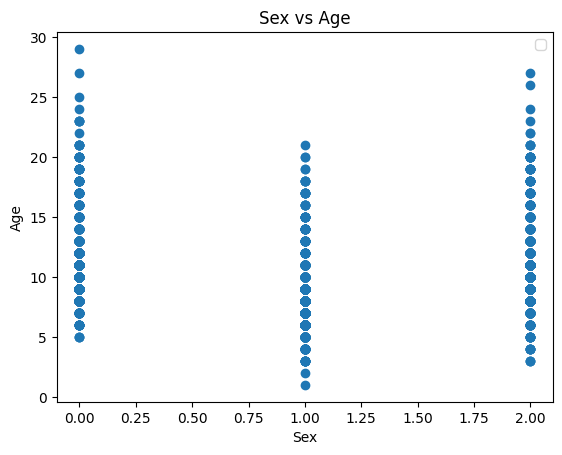

correlation -0.036028758663743436 



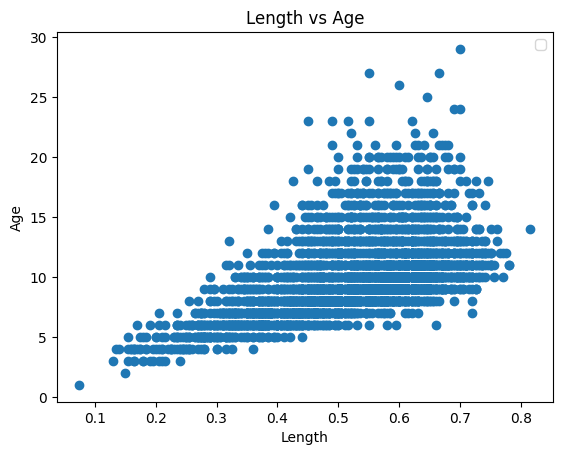

correlation 0.5511309281211589 



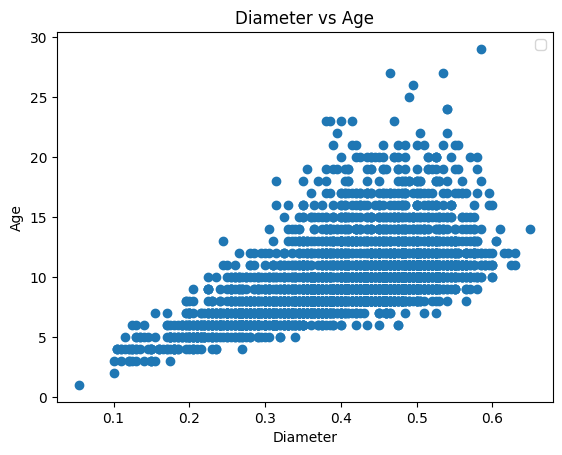

correlation 0.5689072292629539 



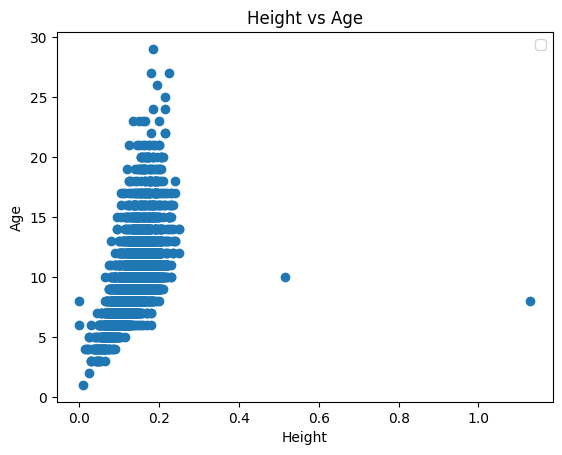

correlation 0.5467599806436204 



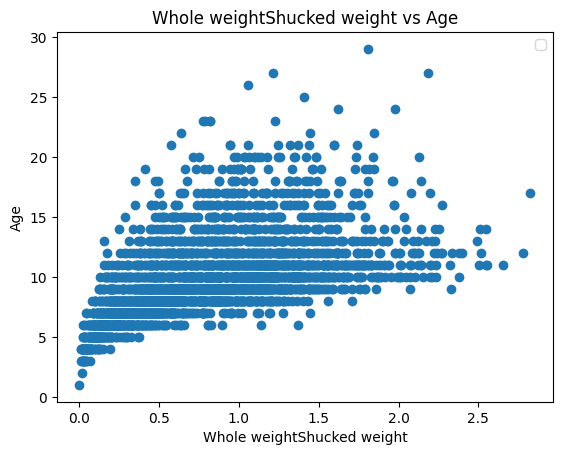

correlation 0.5361791890098578 



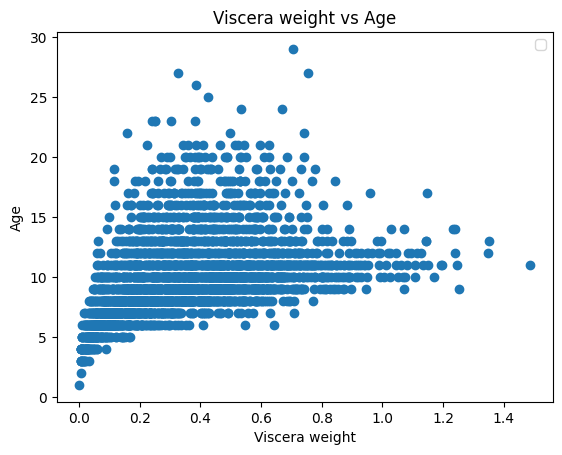

correlation 0.4182745358584577 



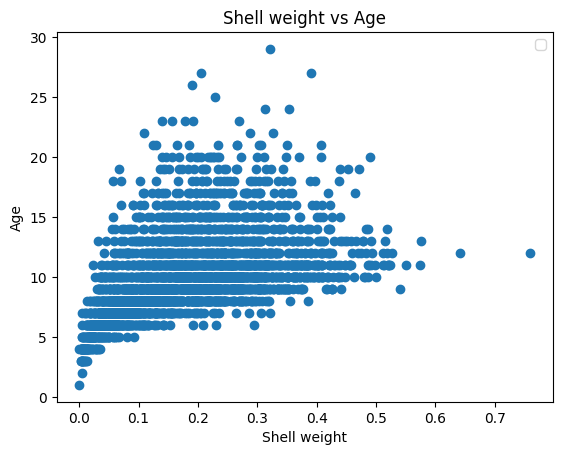

correlation 0.5005815569635793 



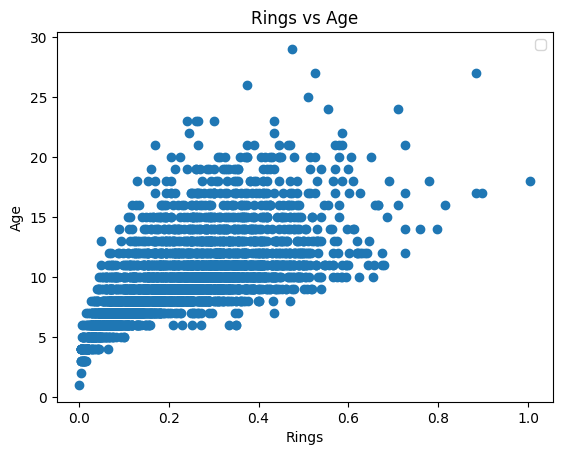

correlation 0.6260077270487417 



In [7]:
# Pilih satu fitur input dari dataset dan plotkan terhadap variabel target menggunakan scatter plot untuk menunjukan korelasinya.
# (Choose one input feature from the dataset and plot it against the target variable using a scatter plot to show its correlation.)

# Pilih satu fitur input dari dataset dan plotkan terhadap variabel target menggunakan scatter plot untuk menunjukan korelasinya.)
# (Choose one input feature from the dataset and plot it against the target variable using a scatter plot to show its correlation.)
### Plotting The Data (5 Point)
for col in df.drop('Age', axis= 1).columns:
  plt.scatter(df[col], df["Age"])
  plt.title(f'{col} vs Age')
  correlation = df[col].corr(df["Age"])
  plt.xlabel(f'{col}')
  plt.ylabel('Age')

  plt.legend()
  plt.show()
  print('correlation',correlation, "\n")

### Question 01 (10 Point) <br>

Based on the plot you created, explain why you selected that feature to analyze. Discuss the relationship between the selected feature and the target variable. Use the text box below to write your explanation.

-- My Answer --


From the data above, the column *Sex* (feature) and the column *Age* (target) do **not** show any correlation.  

Meanwhile, the other columns as features have a positive correlation (around 0.5 or higher) with the *Age* column.  

This proves that attributes such as *Whole weight/Shucked weight*, *Length*, *Height*, *Diameter*, and *Rings* have correlations greater than 0.5, meaning they can be used to determine the age of an abalone. The larger these values are, the older the abalone tends to be.  

It should be noted that the *Rings* feature has the highest correlation with age (able to predict age more accurately, with a correlation of 0.6). However, logistic regression is not limited to predicting from just one input feature, but rather from multiple features. Therefore, it is better to use *Whole weight/Shucked weight*, *Length*, *Height*, *Diameter*, and *Rings* as features, with *Age* as the target variable to be predicted.  


### Logistic Regression (10 Point)

### Model pertama

In [8]:
X = df[['Rings', 'Diameter', 'Whole weightShucked weight', 'Length', 'Height']]
y = df['Age']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size=0.2)

In [10]:
# Kembangkan Model Regresi Logistik Anda Di Sini (Develop your Logistic Regression Model Here)
#Jangan gunakan model lain selain yang diminta (Do not use any AI models other than the one requested.)
main_model = LogisticRegression()
main_model.fit(X_train, y_train)

#Hati hati dalam pemilihan fitur dan variabel target (Be careful in selecting features and the target variable.)
# Print the model MSE, and R-squared

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [11]:
y_pred = main_model.predict(X_test)

In [12]:
print(f"MSE: {mean_squared_error(y_pred, y_test)}")
print(f"Mean Error: {np.sqrt(mean_squared_error(y_pred, y_test))}")
print(f"r^2 score: {r2_score(y_pred, y_test)}")
print(f"intercept: {main_model.intercept_}")
print(f"koefisien: {main_model.coef_}")

MSE: 7.5291479820627805
Mean Error: 2.7439292961121975
r^2 score: -3.119442013075603
intercept: [-1.90859569 -1.96203639  3.02411788  5.31247605  5.73248121  5.33131583
  4.55586796  2.83457734  1.60579547  1.16112701  0.47486167  0.66346527
  0.62884598 -0.18292937 -0.17119578 -0.75585396 -1.10305635 -1.69152604
 -1.40353755 -2.13096111 -2.3141108  -2.73291286 -1.44403485 -3.58790527
 -3.13240855 -3.38868192 -3.41518519]
koefisien: [[-1.87389688e-01 -3.19823556e-01 -6.36748924e-01 -4.08848028e-01
  -1.16947324e-01]
 [-1.86034914e-01 -2.77028919e-01 -6.31144054e-01 -3.36250683e-01
  -1.02708315e-01]
 [-9.39307317e-01 -1.70209472e+00 -3.07755133e+00 -2.16968490e+00
  -5.84390436e-01]
 [-1.49784253e+00 -2.72483865e+00 -4.72867477e+00 -3.35799519e+00
  -9.20158577e-01]
 [-1.74758549e+00 -2.28630051e+00 -5.14050111e+00 -2.74966093e+00
  -7.09643123e-01]
 [-1.81436977e+00 -9.71409735e-01 -4.15523828e+00 -7.64908845e-01
  -5.43354129e-01]
 [-2.80188833e+00  7.30815870e-02 -2.67366409e+00  5.

### Second model (column Diameter vs column Age), used to compare with the first model

In [13]:
X = df[['Rings']]
y = df['Age']

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


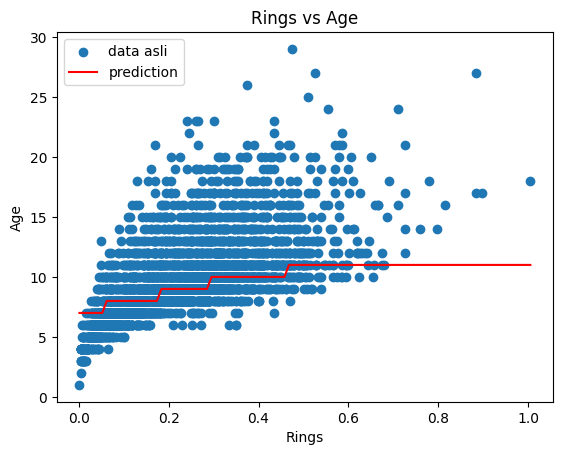

MSE: 7.318385650224215
Mean Error: 2.7052514948196986
r^2 score: -4.96544677689021


In [14]:
plt.scatter(X, y, label = 'data asli')
plt.title('Rings vs Age')
plt.xlabel('Rings')
plt.ylabel('Age')

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size=0.2)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

X_range = np.linspace(X.min(), X.max(), 100).reshape(-1,1)
y_range = model.predict(X_range)

plt.plot(X_range, y_range, label = 'prediction', color = 'red')
plt.legend()
plt.show()
print(f"MSE: {mean_squared_error(y_pred, y_test)}")
print(f"Mean Error: {np.sqrt(mean_squared_error(y_pred, y_test))}")
print(f"r^2 score: {r2_score(y_pred, y_test)}")

### Question 02 (10 Point) <br>

Explain why you selected that columns as the feature and the target variable! Use the text box below to write your explanation.

#### Answer:

--- My Answer --- <br>
It can be seen that when compared using logistic linear regression:

The second model, which only uses the Rings feature, although it has slightly smaller error, does not account for other factors that can determine age.

Therefore, in the first model, important features such as Rings, Diameter, Length, Height, and Whole weight/Shucked weight are combined, since each has a correlation above 0.5 with the target Age based on the previous scatter plots.

The first model is considered more accurate in predicting age, taking into account that age is not determined by just one feature. For this reason, the model was built using logistic linear regression.


### Export Mode

Only change the '''put your model here''' with your model variable and '[angka peserta] [nama lengkap] [SMP/SMA] [nomor soal].pkl'<br>
<br>
Example:<br>
with open('123_PegasusViolinSurjaningtyas_SMA_1.pkl', 'wb') as f:<br>
    pickle.dump(Mymodel, f)

In [15]:
import pickle
# Simpan Model ke File (Save the model to a file)
with open('089_Yohanes_Arya_Prasetyayuda_SMA_2.pkl', 'wb') as f:
    pickle.dump(main_model, f)
    print("Model saved")

Model saved
